<a href="https://colab.research.google.com/github/laidouniyoussef/SLICAlgorithm/blob/main/SLIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

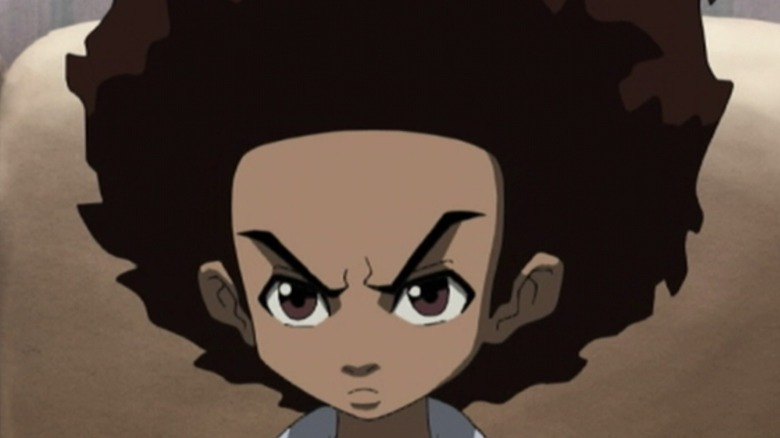

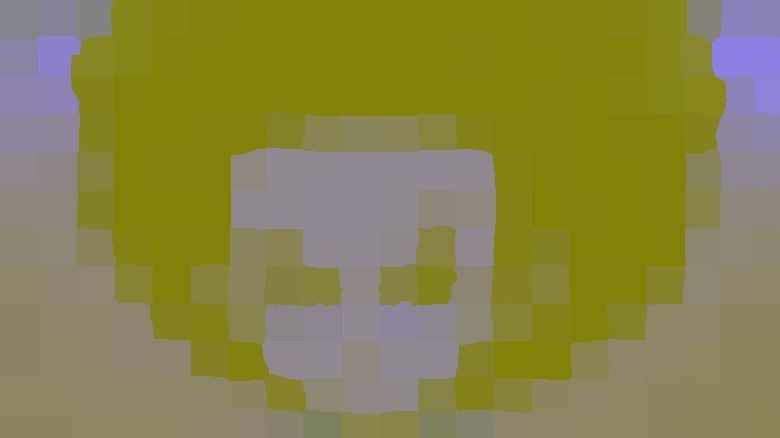

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def slic_algorithm(image, k, m):
    # Convert image to LAB
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Initialize the cluster centers
    step = int(np.sqrt(image.size / k))
    centers = []
    for i in range(step // 2, image.shape[0], step):
        for j in range(step // 2, image.shape[1], step):
            center = [i, j, lab_image[i, j, 0], lab_image[i, j, 1], lab_image[i, j, 2]]
            centers.append(center)
    centers = np.array(centers)

    # Initialize the labels & distances
    labels = np.zeros(image.shape[:2], dtype=np.int32)
    distances = np.full(image.shape[:2], np.inf)

    # Until convergence
    while True:
        # Update the labels & distances
        for i in range(len(centers)):
            x_min = max(0, centers[i, 0] - step)
            x_max = min(image.shape[0], centers[i, 0] + step)
            y_min = max(0, centers[i, 1] - step)
            y_max = min(image.shape[1], centers[i, 1] + step)
            for x in range(x_min, x_max):
                for y in range(y_min, y_max):
                    d = np.sqrt((x - centers[i, 0]) ** 2 + (y - centers[i, 1]) ** 2)
                    c = np.sqrt((lab_image[x, y, 0] - centers[i, 2]) ** 2 + (lab_image[x, y, 1] - centers[i, 3]) ** 2 + (lab_image[x, y, 2] - centers[i, 4]) ** 2)
                    distance = np.sqrt(d ** 2 + (c / m) ** 2)
                    if distance < distances[x, y]:
                        distances[x, y] = distance
                        labels[x, y] = i

        # Update the cluster centers
        new_centers = np.zeros_like(centers)
        counts = np.zeros(len(centers))
        for x in range(image.shape[0]):
            for y in range(image.shape[1]):
                new_centers[labels[x, y]] += [x, y, lab_image[x, y, 0], lab_image[x, y, 1], lab_image[x, y, 2]]
                counts[labels[x, y]] += 1
        for i in range(len(centers)):
            if counts[i] > 0:
                new_centers[i] = (new_centers[i] / counts[i])
        if np.allclose(centers, new_centers):
            break
        centers = new_centers

    # Segmented image
    segmented_image = np.zeros_like(image)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            segmented_image[x, y] = centers[labels[x, y], 2:]

    return segmented_image

# Main
def main():
    # Load an image
    image_path = 'me.jpg'
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Unable to load the image from {image_path}")
        return

    # Parameters for SLIC algorithm
    k = 700  # Number of superpixels
    m = 10.0  # Weight for spatial distance

    # SLIC algorithm
    segmented_image = slic_algorithm(image, k, m)

    # Display the original and segmented images
    cv2_imshow(image)
    cv2_imshow(segmented_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


if __name__ == "__main__":
    main()
